## 1. Importing Liraries

In [230]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import neighbors, datasets

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


from ipywidgets import interact, fixed


## 2. Loading Dataset

In [231]:
cancer_df = pd.read_csv(r"../../dataset/breast_cancer_data.csv")


In [232]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- will drop id column and unamed column it wont be useful for this task`

In [233]:
cancer_df["diagnosis"].replace(["M", "B"], [1,0], inplace=True)

In [234]:
cancer_df.drop(columns=["id","Unnamed: 32"], inplace=True)

In [235]:
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 3. split data

In [236]:
# X = cancer_df.iloc[:,1:]
# X.head()

In [237]:
# y =cancer_df.iloc[:,0]
# y.head()

In [238]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df.iloc[:,1:], cancer_df.iloc[:,0], test_size=0.2, random_state=7)

In [239]:
X_train.shape

(455, 30)

- while working with knn its important to have scaled dataset
- the reason is knn compltely rely on calculating distances 
- will apply standard scasler class

In [240]:
scaler = StandardScaler()


In [241]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)      # the reason we just used fit since we want to use mean and sd of x_train

## 4. Fit knn Model

In [242]:
knn = KNeighborsClassifier(n_neighbors=7) 

In [243]:
knn.fit(X_train,y_train) # trained model using X_train, y_train 

KNeighborsClassifier(n_neighbors=7)

In [244]:
y_pred_train = knn.predict(X_train)

In [245]:
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9649122807017544

## 5. How to Select K Values

Selecting the appropriate value for \( k \) is crucial for the performance of \( k \)-nearest neighbors (KNN) algorithm. There are two main approaches to select the optimal \( k \) value:

1. **Heuristic Approach:** 
   - This involves using rules of thumb or past experiences to choose a value for \( k \). For instance, some common heuristics include choosing \( k \) as the square root of the number of data points.

2. **Experimentation Approach:**
   - This involves empirically finding the best \( k \) value through cross-validation. By systematically evaluating the model with different \( k \) values and choosing the one that performs best on the validation set, we can determine the most suitable \( k \).

#### Using Experimentation to Find the Best K Value

In this project, we will use the experimentation approach to select the best \( k \) value. Specifically, we will perform cross-validation to evaluate different \( k \) values and select the one that yields the highest performance metrics.

Steps:
1. Split the dataset into training and validation sets.
2. Train the KNN model with different \( k \) values on the training set.
3. Evaluate each model's performance on the validation set.
4. Select the \( k \) value that results in the best cross-validation performance.



In [246]:
scores = []

for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

In [247]:
scores

[0.9122807017543859,
 0.9298245614035088,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9649122807017544,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315]

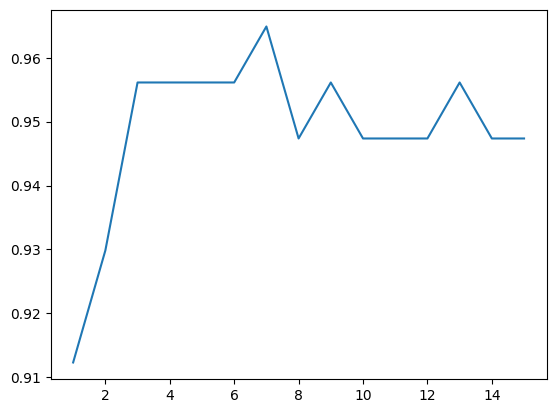

In [248]:
plt.plot(range(1,16), scores)

- for k = 7, i am getting the maximum accuracy

## 6.Classification Report

In [249]:
print(classification_report(y_test ,
                     y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        74
           1       1.00      0.85      0.92        40

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [250]:
print(classification_report(y_train ,
                     y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       283
           1       0.99      0.93      0.96       172

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455



## 7. Decision Surface

- we wont be able to visualize 30 columns so just for visuualization purpose will consider first 2 columns

In [251]:
#!pip install mlxtend --quiet



In [252]:
from mlxtend.plotting import plot_decision_regions


In [255]:
X = X_train[:, :2]

#  y_train is a pandas Series converting to numpy array
y = y_train.values


In [266]:
X.shape

(455, 2)

In [267]:
def plot_decision_regions_interactive(n_neighbors, X, y):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)
    plot_decision_regions(X, y, clf=knn, legend=2)

# Create an interactive plot using interact
interact(plot_decision_regions_interactive, n_neighbors=(1, 455), X=fixed(X), y=fixed(y))

interactive(children=(IntSlider(value=228, description='n_neighbors', max=455, min=1), Output()), _dom_classes…

<function __main__.plot_decision_regions_interactive(n_neighbors, X, y)>

## Observations on K-Nearest Neighbors (KNN) Classifier

- When \( k = 1 \) (minimum), the classifier considers only the nearest neighbor. If this neighbor is benign, even if the actual point is malignant, it will classify it as benign. This leads to overfitting, where the model performs well on training data but poorly on new data.
  
- When \( k \) is set to the maximum (e.g., number of data points), the classifier tends to follow the majority class in the dataset. This oversimplifies the model, making it too generalized and resulting in underfitting. It fails to capture the nuances of the data.

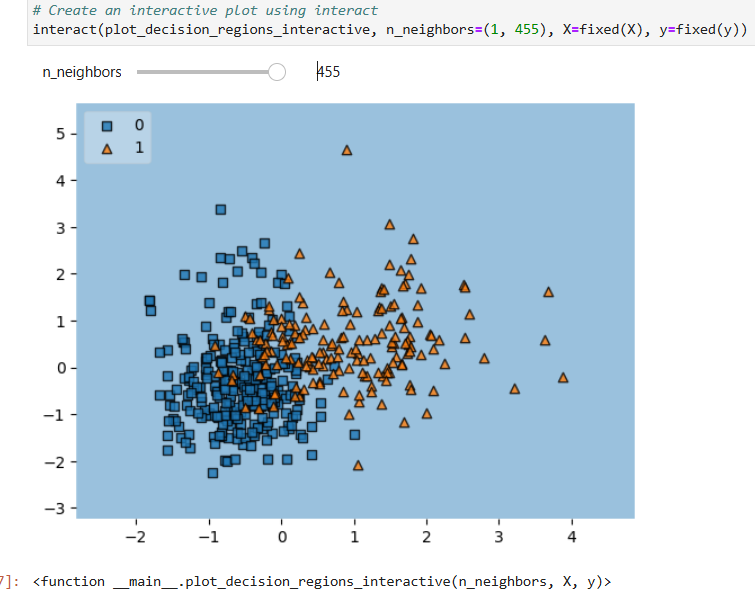

- Therefore, choosing \( k \) through experimentation helps find an intermediate value. This value balances between overfitting and underfitting, optimizing the model's performance on both training and new data.
